In [ ]:
'''
data source: https://www.kaggle.com/douglaskgaraujo/opportunity-insights-real-time-economic-tracker-us?select=README.md
'''

In [70]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

resources_path = 'Resources/Economic_Data_Covid/data'

In [52]:
for file in os.listdir(resources_path):
    print(file)

Employment Combined - State - Daily.csv
Womply Revenue - National - Daily.csv
Womply Revenue - County - Daily.csv
UI Claims - State - Weekly.csv
Womply Merchants - State - Daily.csv
Zearn - State - Weekly.csv
COVID Tests - National - Daily.csv
Google Mobility - State - Daily.csv
GeoIDs - County.csv
UI Claims - National - Weekly.csv
Employment Combined - National - Daily.csv
COVID Deaths - National - Daily.csv
Google Mobility - National - Daily.csv
Affinity - National - Daily.csv
COVID Tests - State - Daily.csv
COVID Deaths - County - Daily.csv
Zearn - City - Weekly.csv
Employment Combined - City - Daily.csv
COVID Cases - City - Daily.csv
Affinity - City - Daily.csv
COVID Deaths - State - Daily.csv
Womply Merchants - City - Daily.csv
Zearn - County - Weekly.csv
Google Mobility - City - Daily.csv
COVID Cases - State - Daily.csv
Womply Revenue - City - Daily.csv
Affinity - County - Daily.csv
UI Claims - County - Weekly.csv
Womply Merchants - County - Daily.csv
Womply Merchants - National 

In [53]:
google_city_daily_df = pd.read_csv(f'{resources_path}/Google Mobility - City - Daily.csv')
merchants_city_daily_df = pd.read_csv(f'{resources_path}/Womply Merchants - City - Daily.csv')
city_geoids_df = pd.read_csv(f'{resources_path}/GeoIDs - City.csv')
revenue_city_daily_df = pd.read_csv(f'{resources_path}/Womply Revenue - City - Daily.csv')
employment_city_daily_df = pd.read_csv(f'{resources_path}/Employment Combined - City - Daily.csv')
#merge based on city id so we can see which city, etc
merchants_city_daily_df = pd.merge(merchants_city_daily_df, city_geoids_df, on = 'cityid')
google_city_daily_df = pd.merge(google_city_daily_df, city_geoids_df, on = 'cityid')
revenue_city_daily_df = pd.merge(revenue_city_daily_df, city_geoids_df, on = 'cityid')
employment_city_daily_df = pd.merge(employment_city_daily_df, city_geoids_df, on = 'cityid')

In [54]:
'''
Employment
Employment levels relative to Jan 4-31 from Paychex, Earnin, and Intuit.

emp_combined: Employment level for all workers.
emp_combined_inclow: Employment level for workers in the bottom quartile of the income distribution (incomes approximately under $27,000).
emp_combined_incmiddle: Employment level for workers in the middle two quartiles of the income distribution (incomes approximately $27,000 to $60,000).
emp_combined_inchigh: Employment level for workers in the top quartile of the income distribution (incomes approximately over $60,000).
emp_combined_ss40: Employment level for workers in trade, transportation and utilities (NAICS supersector 40).
emp_combined_ss60: Employment level for workers in professional and business services (NAICS supersector 60).
emp_combined_ss65: Employment level for workers in education and health services (NAICS supersector 65).
emp_combined_ss70: Employment level for workers in leisure and hospitality (NAICS supersector 70).
'''
employment_city_daily_df.head()

,year,month,day,cityid,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,cityname,stateabbrev,statename,statefips,city_pop2019
0,2020,1,15,1,-.00917,-.00391,-.011,-.00684,Los Angeles,CA,California,6,10039107
1,2020,1,16,1,-.00687,-.0043,-.00807,-.00509,Los Angeles,CA,California,6,10039107
2,2020,1,17,1,-.00456,-.00464,-.00513,-.00334,Los Angeles,CA,California,6,10039107
3,2020,1,18,1,-.00224,-.00483,-.00219,-.0016,Los Angeles,CA,California,6,10039107
4,2020,1,19,1,.0000759,-.00501,.000753,.000148,Los Angeles,CA,California,6,10039107


In [55]:
employment_city_daily_df['emp_combined'].replace({'.':'0.0'}, inplace = True)

In [56]:
employment_city_daily_df['month'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [57]:
employment_city_daily_df.dtypes

year                       int64
month                      int64
day                        int64
cityid                     int64
emp_combined              object
emp_combined_inclow       object
emp_combined_incmiddle    object
emp_combined_inchigh      object
cityname                  object
stateabbrev               object
statename                 object
statefips                  int64
city_pop2019               int64
dtype: object

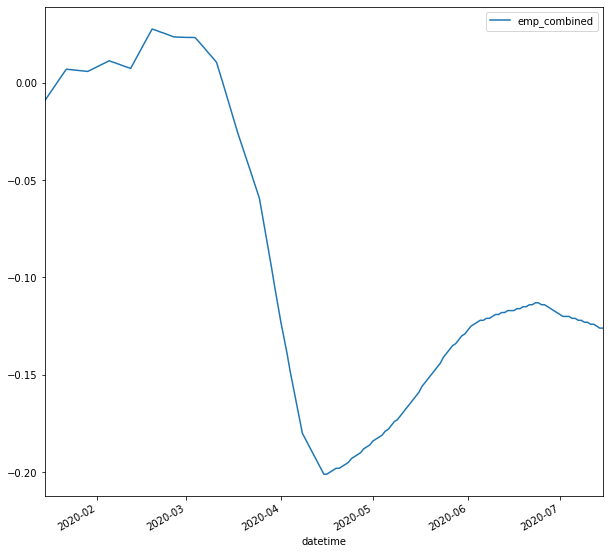

In [58]:
employment_city_daily_df = employment_city_daily_df.loc[employment_city_daily_df['cityname'] == 'Los Angeles']

employment_city_daily_df['day'] = pd.to_numeric(employment_city_daily_df['day'])
employment_city_daily_df['emp_combined'] = pd.to_numeric(employment_city_daily_df['emp_combined'])

employment_city_daily_df['datetime']=pd.to_datetime(employment_city_daily_df[['year','month','day']])

employment_city_daily_df.set_index('datetime')


employment_city_daily_df.sort_values('day',ascending = False).plot(kind = 'line', 
                                                                   figsize = (10, 10), 
                                                                   x = 'datetime',
                                                                   y = 'emp_combined')


# for i in range(1, 8):
    

In [59]:
'''
Womply Revenue
Small business revenue data from Womply.

revenue_all: Percent change in net revenue for small businesses, calculated as a seven-day moving average, seasonally adjusted, and indexed to January 4-31 2020.
revenue_inchigh: Percent change in net revenue for small businesses, calculated as a seven-day moving average, seasonally adjusted, and indexed to January 4-31 2020 in high income (quartile 4 of median income) zipcodes.
revenue_inclow: Percent change in net revenue for small businesses, calculated as a seven-day moving average, seasonally adjusted, and indexed to January 4-31 2020 in low income (quartile 1 of median income) zipcodes.
revenue_incmiddle: Percent change in net revenue for small businesses, calculated as a seven-day moving average, seasonally adjusted, and indexed to January 4-31 2020 in middle income (quartiles 2 & 3 of median income) zipcodes.
revenue_ss40: Percent change in net revenue for small businesses, calculated as a seven-day moving average, seasonally adjusted, and indexed to January 4-31 2020 in transportation (NAICS supersector 40).
revenue_ss65: Percent change in net revenue for small businesses, calculated as a seven-day moving average, seasonally adjusted, and indexed to January 4-31 2020 in education and health services (NAICS supersector 65).
revenue_ss70: Percent change in net revenue for small businesses, calculated as a seven-day moving average, seasonally adjusted, and indexed to January 4-31 2020 in leisure and hospitality (NAICS supersector 70).
'''
revenue_city_daily_df.head()

,year,month,day,cityid,revenue_all,revenue_ss40,revenue_ss65,revenue_ss70,cityname,stateabbrev,statename,statefips,city_pop2019
0,2020,1,10,1,-0.0298,-0.02770,-0.1250,0.002320,Los Angeles,CA,California,6,10039107
1,2020,1,11,1,-0.0143,0.00316,-0.0991,-0.000814,Los Angeles,CA,California,6,10039107
2,2020,1,12,1,-0.0122,0.00225,-0.0991,-0.005360,Los Angeles,CA,California,6,10039107
3,2020,1,13,1,-0.0218,0.01480,-0.1250,-0.016300,Los Angeles,CA,California,6,10039107
4,2020,1,14,1,0.0119,0.04420,-0.0195,-0.023100,Los Angeles,CA,California,6,10039107


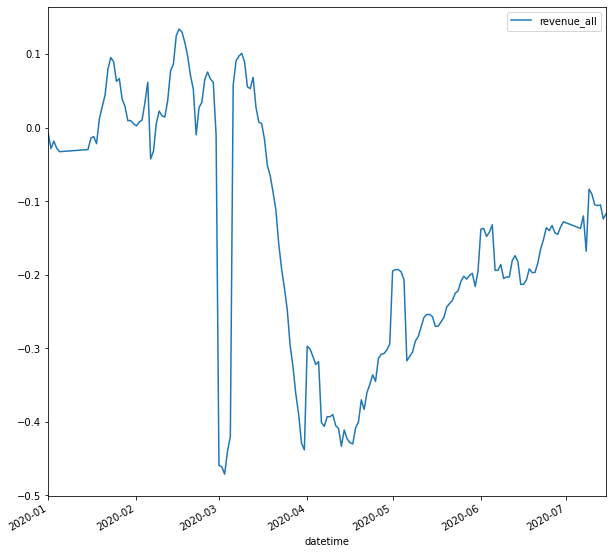

In [61]:
revenue_city_daily_df = revenue_city_daily_df.loc[revenue_city_daily_df['cityname'] == 'Los Angeles']

# revenue_city_daily_df['revenue_all'].replace({'.':'0.0'}, inplace = True)

revenue_city_daily_df['day'] = pd.to_numeric(employment_city_daily_df['day'])
revenue_city_daily_df['revenue_all'] = pd.to_numeric(revenue_city_daily_df['revenue_all'])

revenue_city_daily_df['datetime']=pd.to_datetime(revenue_city_daily_df[['year','month','day']])

revenue_city_daily_df.set_index('datetime')

revenue_city_daily_df.sort_values('day',ascending = False).plot(kind = 'line', 
                                                                   figsize = (10, 10), 
                                                                   x = 'datetime',
                                                                   y = 'revenue_all')

In [63]:
'''
Google Mobility
GPS mobility data indexed to Jan 3-Feb 6 2020 from Google COVID-19 Community Mobility Reports.

gps_away_from_home: Time spent outside of residential locations.
gps_retail_and_recreation: Time spent at retail and recreation locations.
gps_grocery_and_pharmacy: Time spent at grocery and pharmacy locations.
gps_parks: Time spent at parks.
gps_transit_stations: Time at inside transit stations.
gps_workplaces: Time spent at work places.
gps_residential: Time spent at residential locations.
'''

google_city_daily_df['datetime']=pd.to_datetime(google_city_daily_df[['year','month','day']])

google_city_daily_df = google_city_daily_df.set_index('datetime')

google_city_daily_df.head()

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,cityname,stateabbrev,statename,statefips,city_pop2019
datetime,,,,,,,,,,,,,,,,
2020-02-24,2020,2,24,1,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625,Los Angeles,CA,California,6,10039107
2020-02-25,2020,2,25,1,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020,Los Angeles,CA,California,6,10039107
2020-02-26,2020,2,26,1,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620,Los Angeles,CA,California,6,10039107
2020-02-27,2020,2,27,1,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620,Los Angeles,CA,California,6,10039107
2020-02-28,2020,2,28,1,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000,Los Angeles,CA,California,6,10039107


In [68]:
city_dfs = {}
for city in city_geoids_df['cityname'].unique():
    print(city)
    city_dfs[city] = pd.merge(google_city_daily_df.loc[google_city_daily_df['cityname'] == city],
                                    merchants_city_daily_df.loc[merchants_city_daily_df['cityname'] == city],
                                    on = 'datetime')
city_dfs['Los Angeles'].head()

Los Angeles
New York City
Chicago
Houston
Phoenix
San Diego
Dallas
Las Vegas
Seattle
Fort Worth
San Antonio
San Jose
Detroit
Philadelphia
Columbus
Austin
Charlotte
Indianapolis
Jacksonville
Memphis
San Francisco
El Paso
Baltimore
Portland
Boston
Oklahoma City
Louisville
Denver
Washington
Nashville
Milwaukee
Albuquerque
Tucson
Fresno
Sacramento
Atlanta
Kansas City
Miami
Raleigh
Omaha
Oakland
Minneapolis
Tampa
New Orleans
Wichita
Cleveland
Bakersfield
Honolulu
Boise
Salt Lake City
Virginia Beach
Colorado Springs
Tulsa


,year_x,month_x,day_x,cityid_x,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,...,cityid_y,merchants_all,merchants_ss40,merchants_ss65,merchants_ss70,cityname_y,stateabbrev_y,statename_y,statefips_y,city_pop2019_y
datetime,,,,,,,,,,,,,,,,,,,,,
2020-02-24,2020,2,24,1,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,...,1,0.00497,0.01060,0.01970,0.00611,Los Angeles,CA,California,6,10039107
2020-02-25,2020,2,25,1,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,...,1,0.00086,0.00638,0.00735,0.00176,Los Angeles,CA,California,6,10039107
2020-02-26,2020,2,26,1,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,...,1,-0.00234,0.00243,0.00066,0.00143,Los Angeles,CA,California,6,10039107
2020-02-27,2020,2,27,1,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,...,1,-0.00193,0.00566,-0.00297,0.00351,Los Angeles,CA,California,6,10039107
2020-02-28,2020,2,28,1,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,...,1,-0.00107,0.00636,-0.00809,0.00648,Los Angeles,CA,California,6,10039107


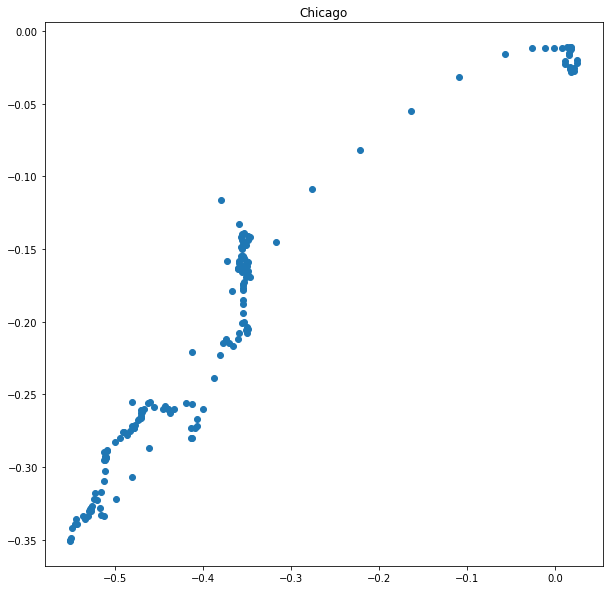

In [75]:
city = 'Chicago'

plt.figure(figsize = (10,10))
plt.scatter(city_dfs[city]['gps_workplaces'], city_dfs[city]['merchants_all'])
plt.title(city)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


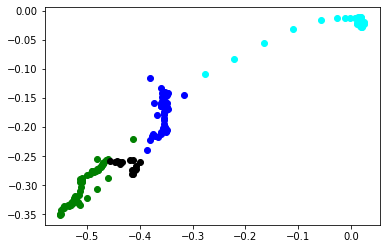

In [78]:
from sklearn.mixture import GaussianMixture

city = 'Chicago'

data = city_dfs[city][['gps_workplaces','merchants_all']]

# print(data.head())

gmm = GaussianMixture(n_components = 4) #components == # of clutsers
gmm.fit(data)

labels = gmm.predict(data)
frame = data
frame['cluster'] = labels
frame.columns = ['gps_workplaces','merchants_all','cluster']

color = ['blue','green','cyan','black']
for k in range(0, 4):
    data = frame[frame['cluster'] == k]
    plt.scatter(data['gps_workplaces'],data['merchants_all'], c = color[k])
plt.show()

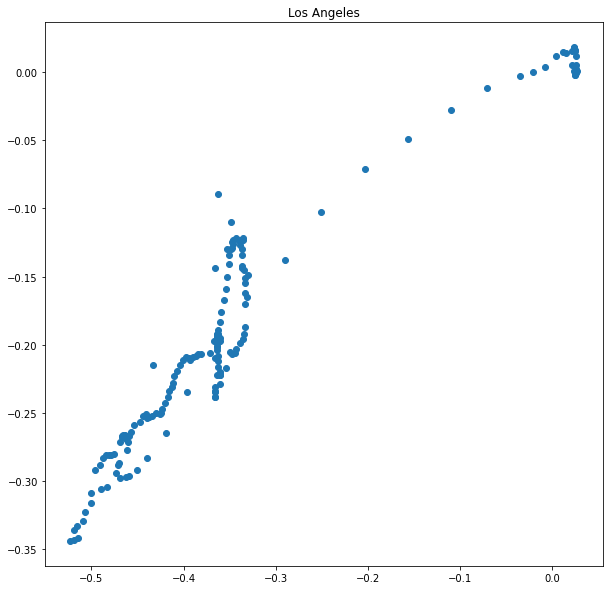

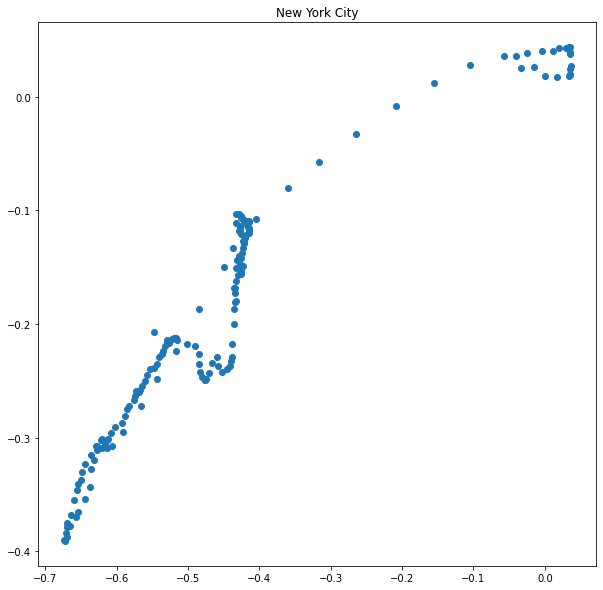

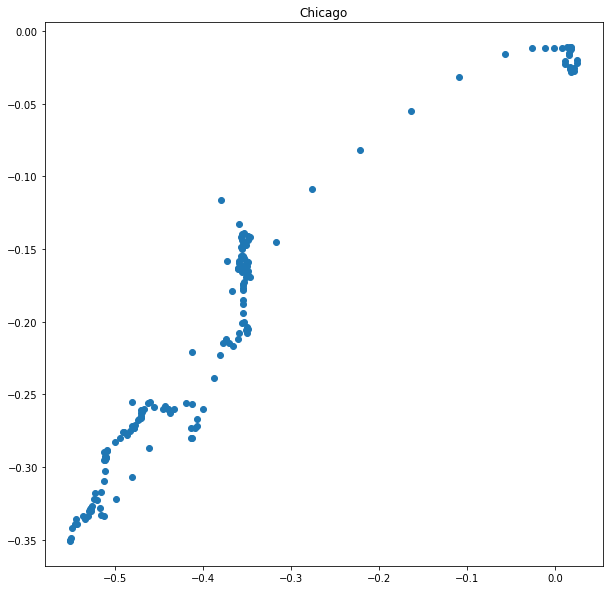

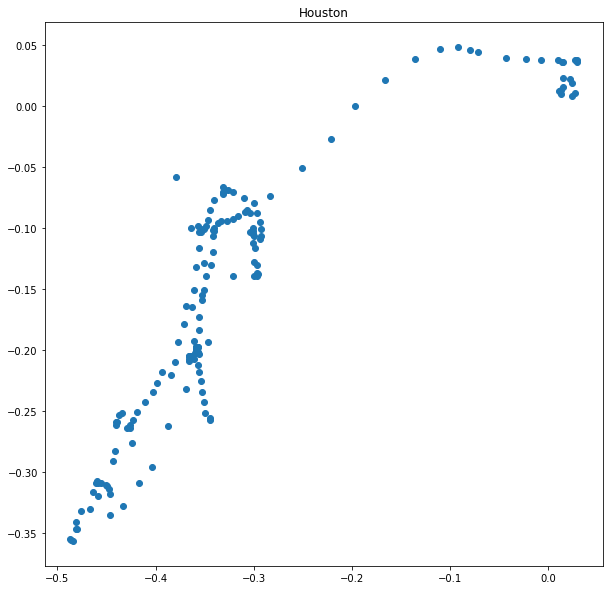

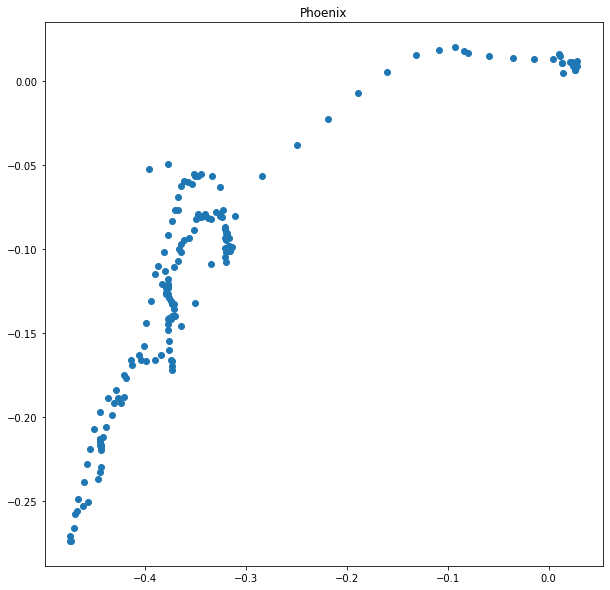

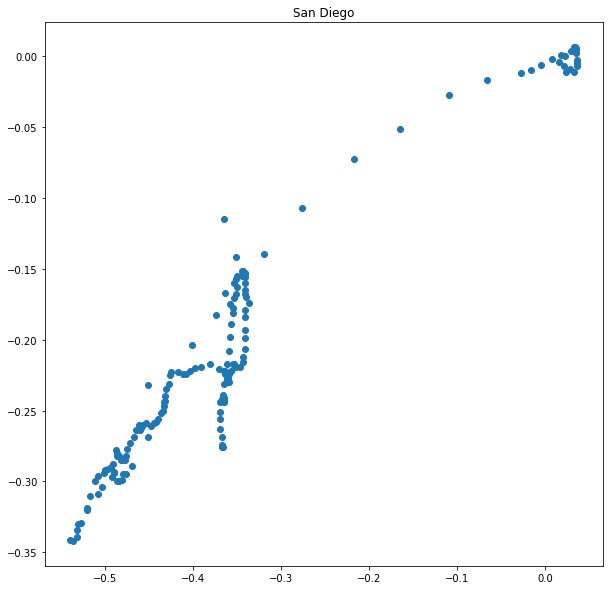

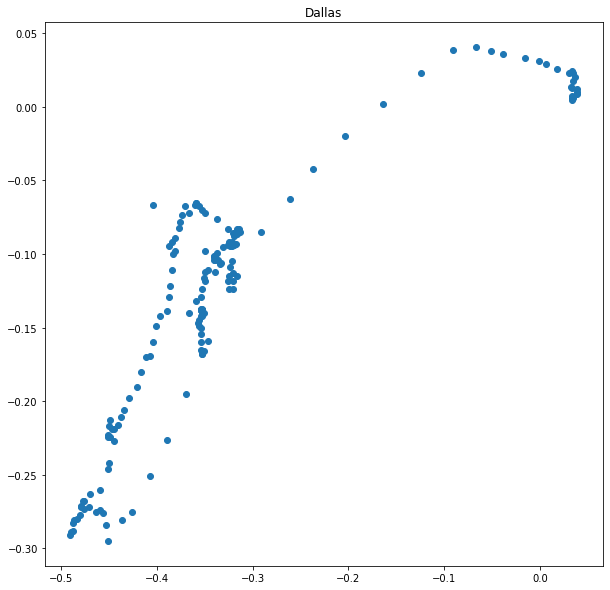

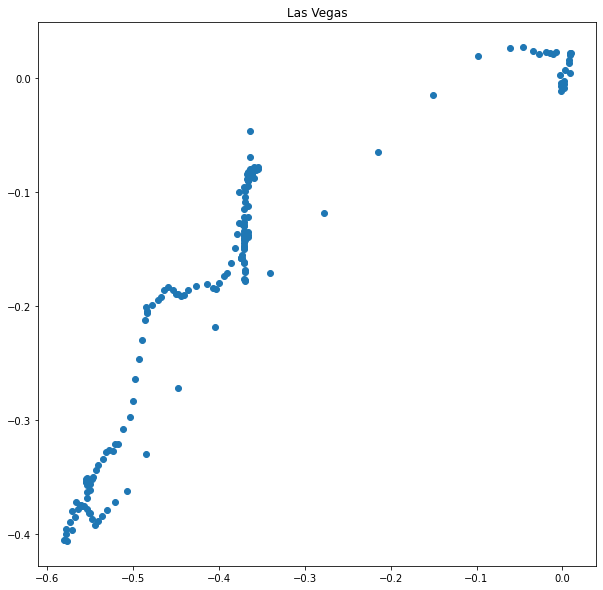

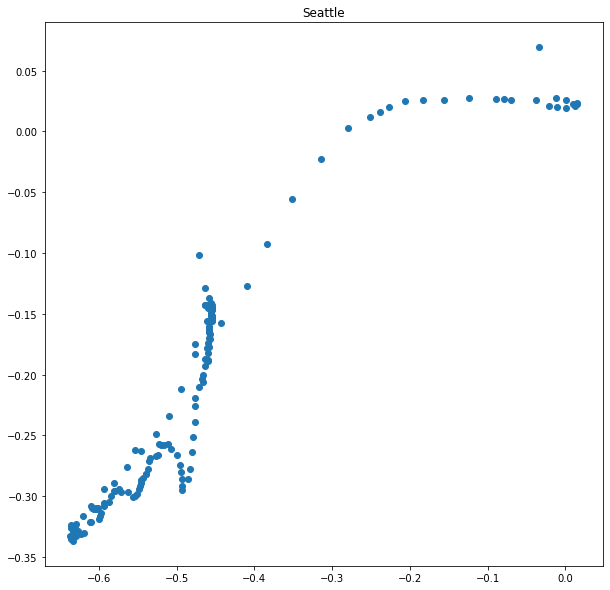

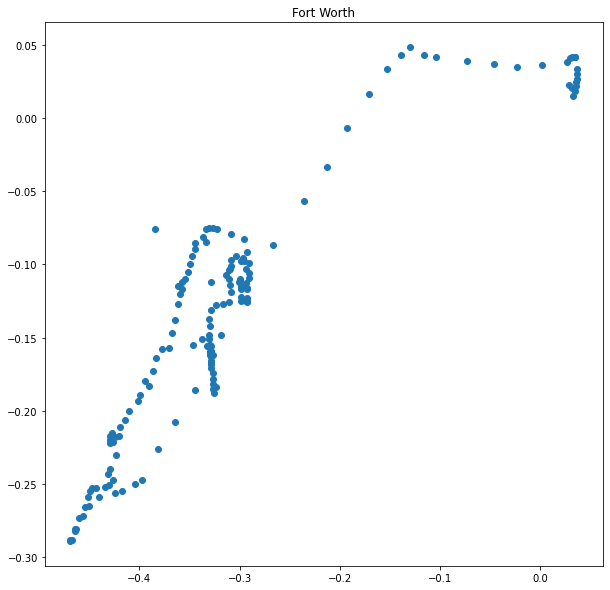

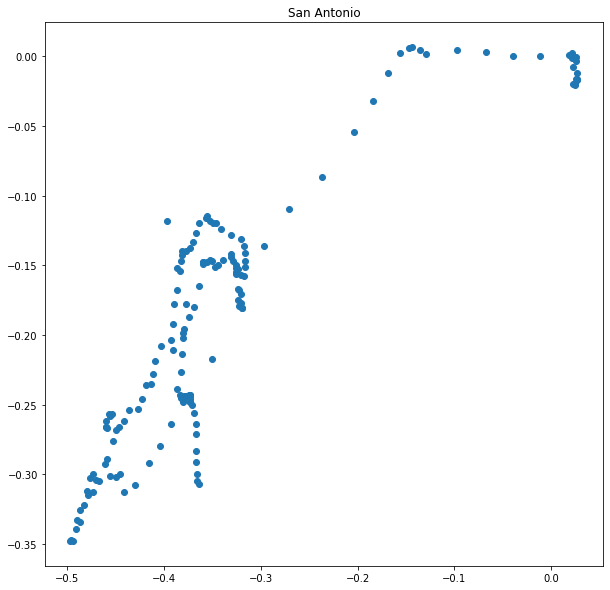

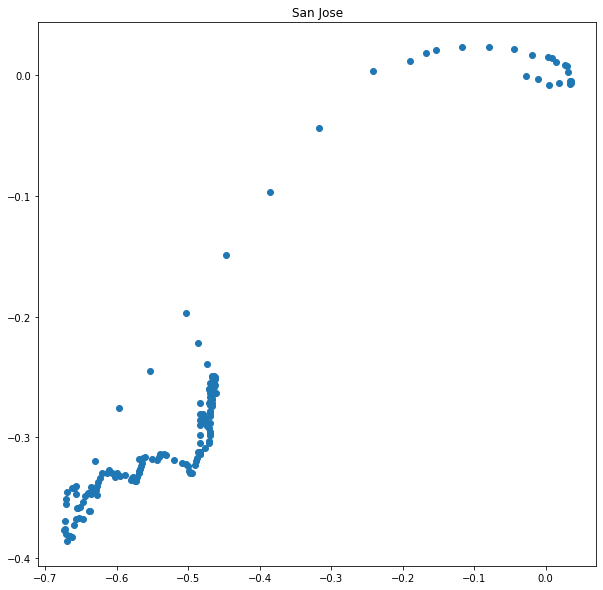

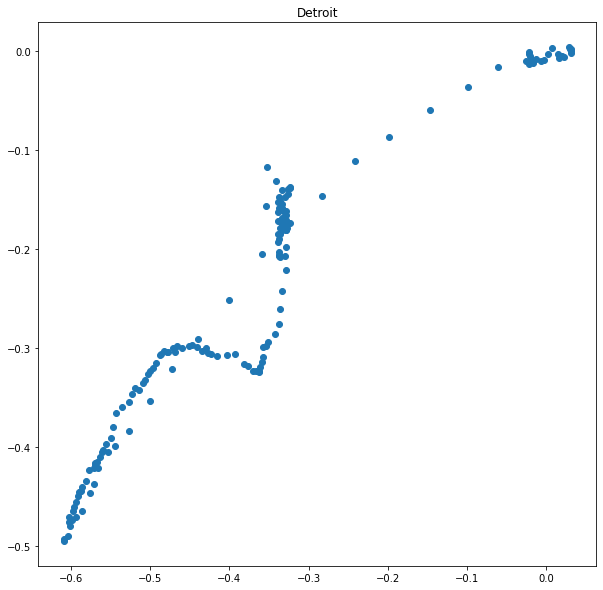

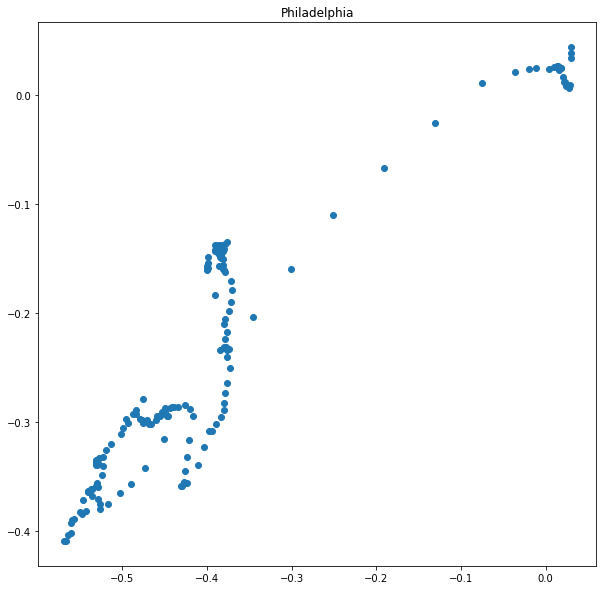

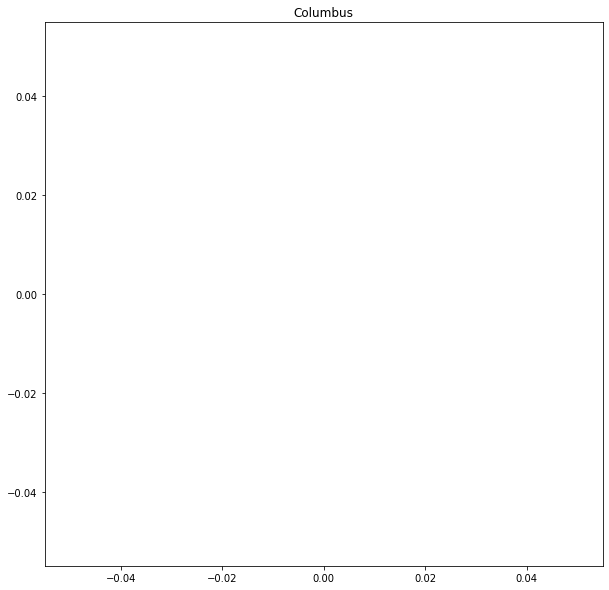

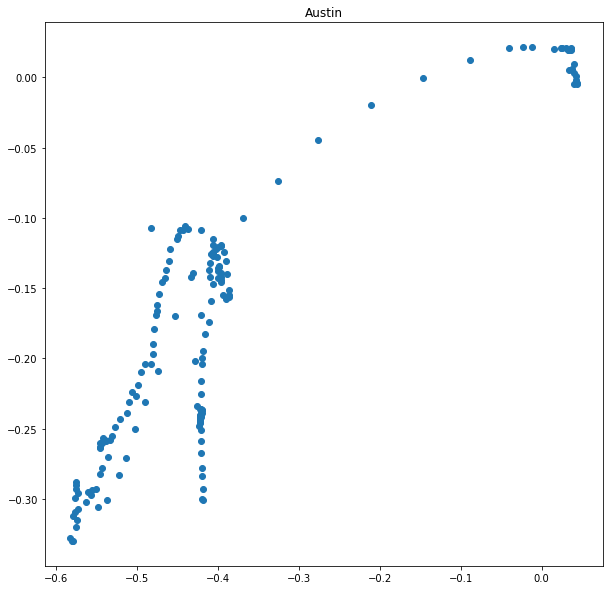

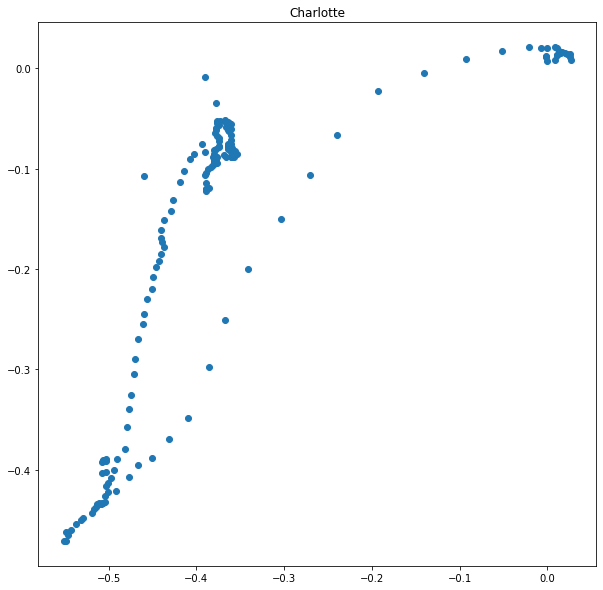

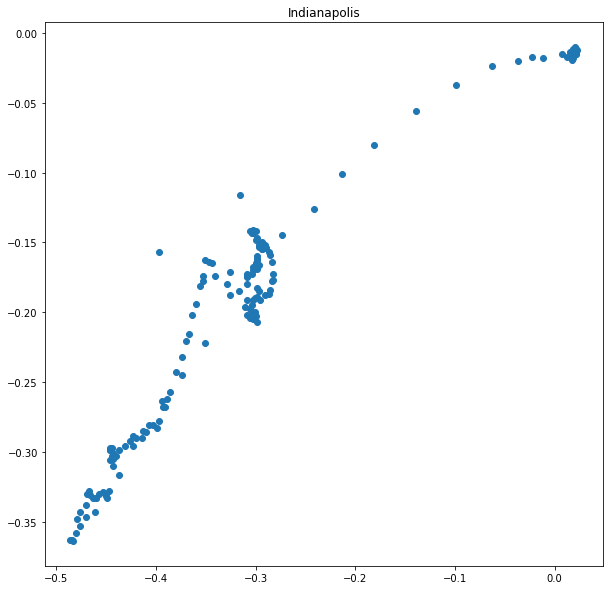

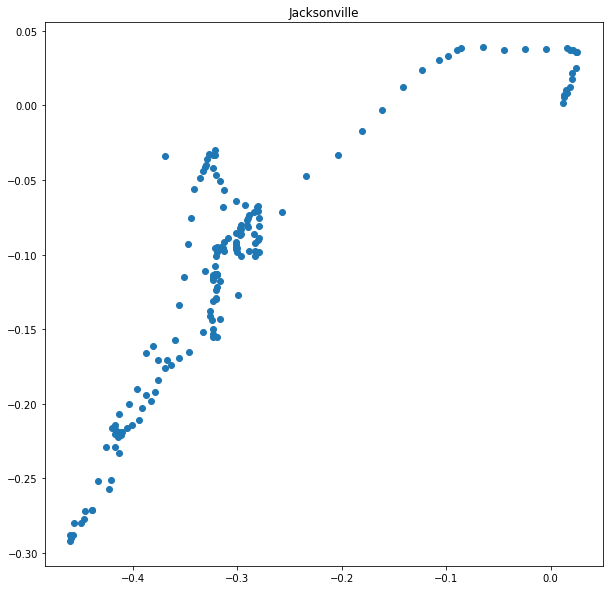

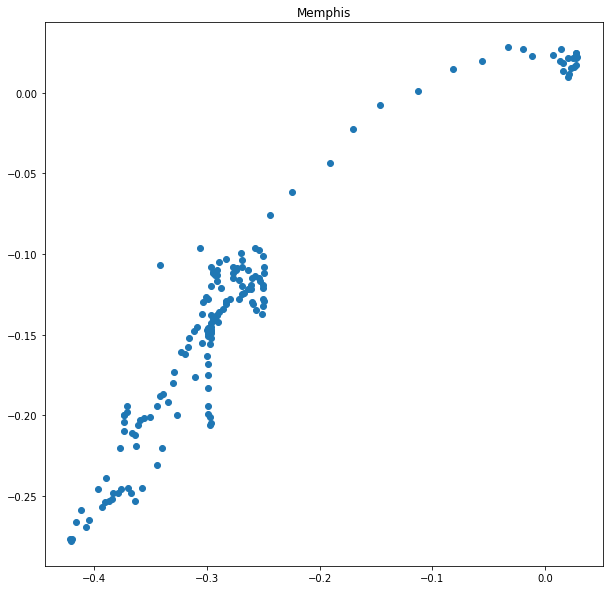

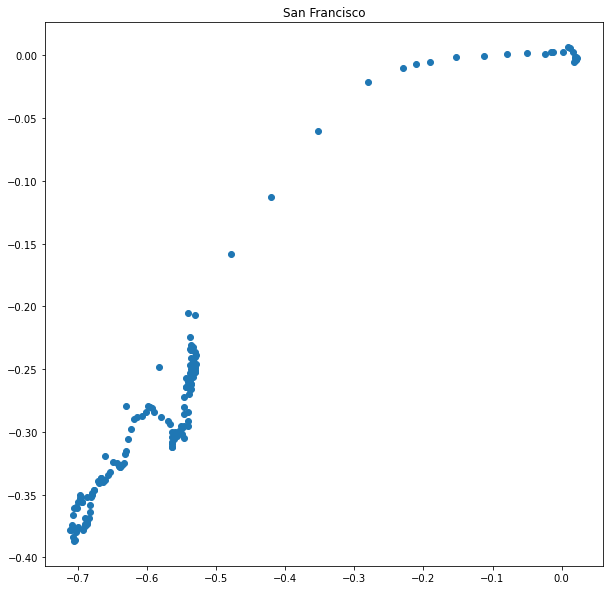

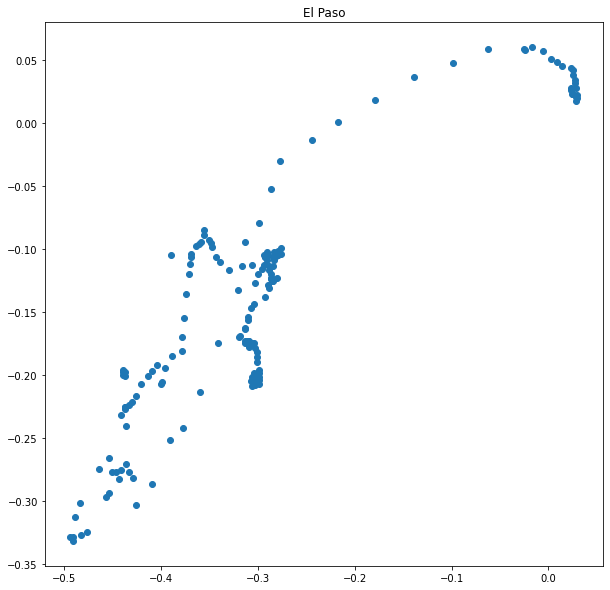

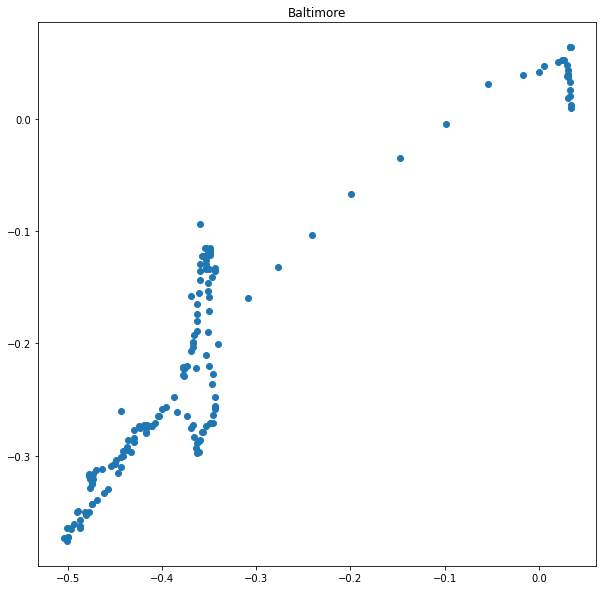

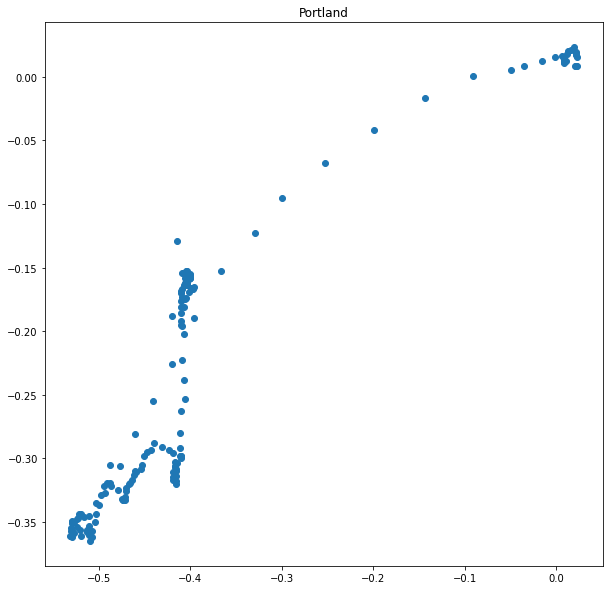

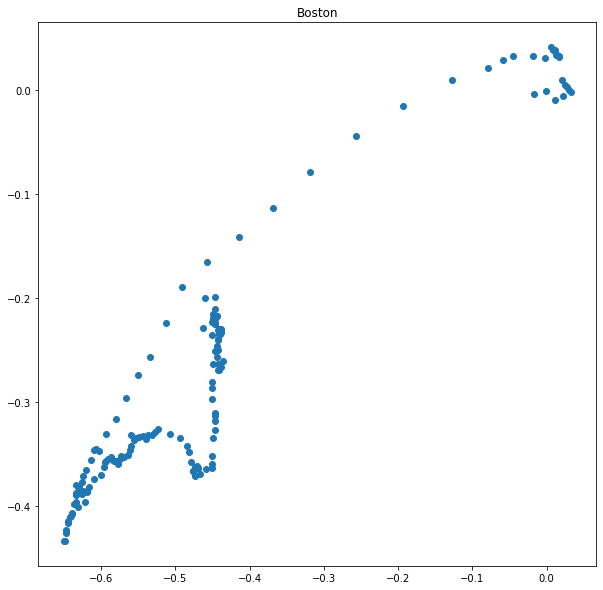

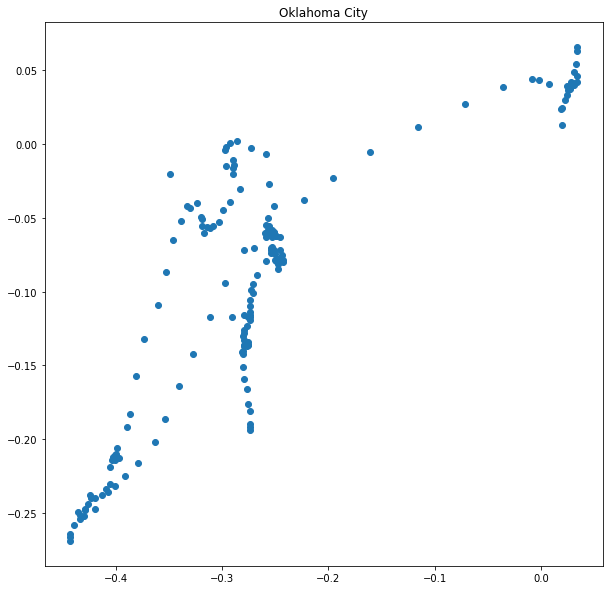

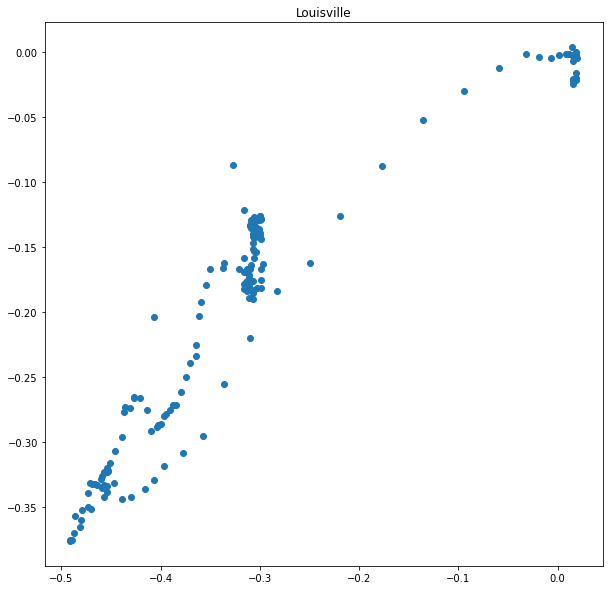

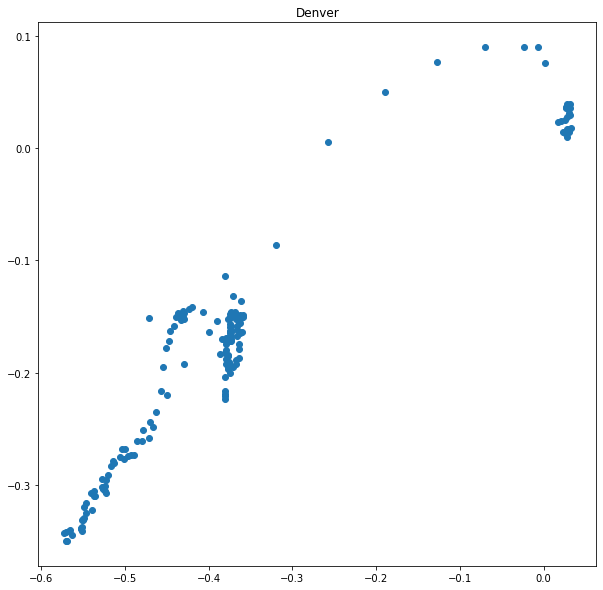

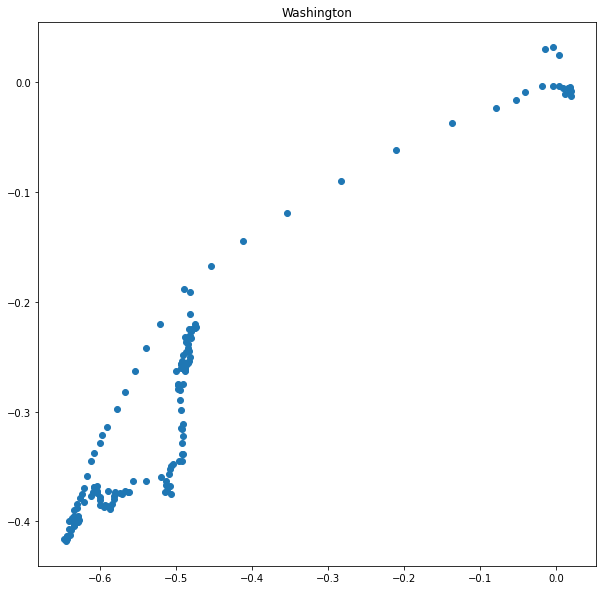

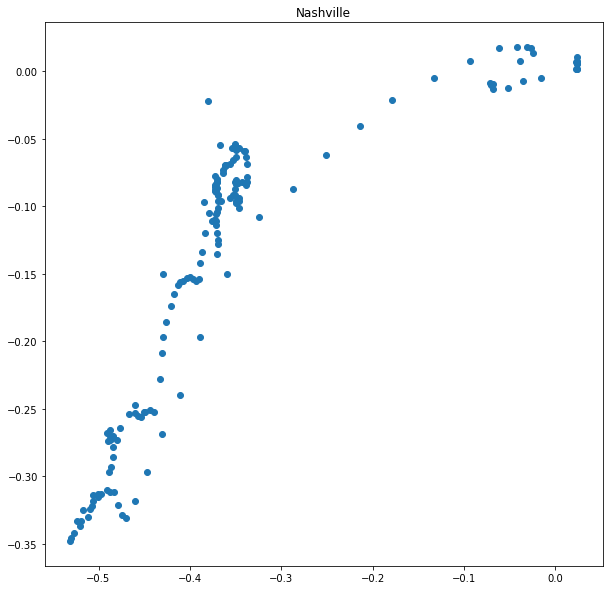

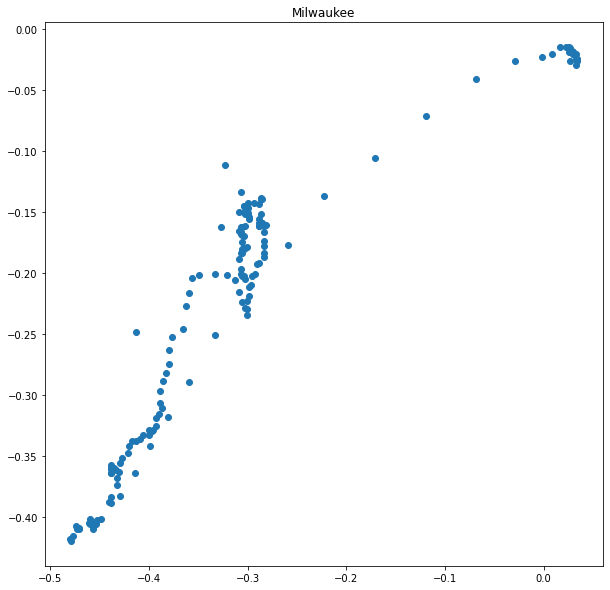

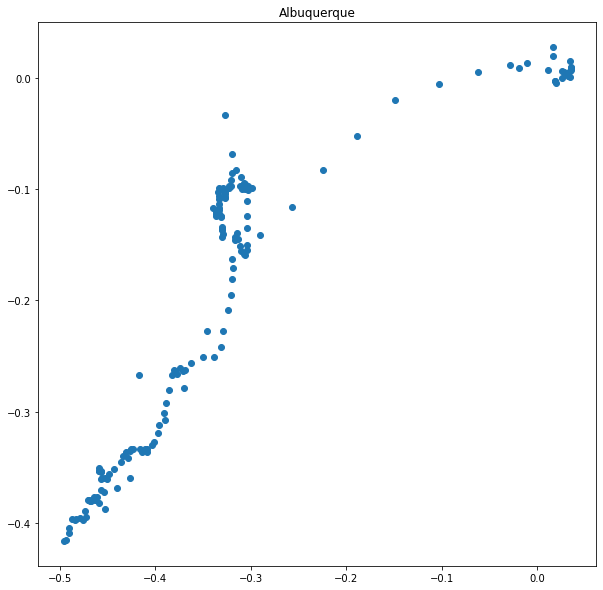

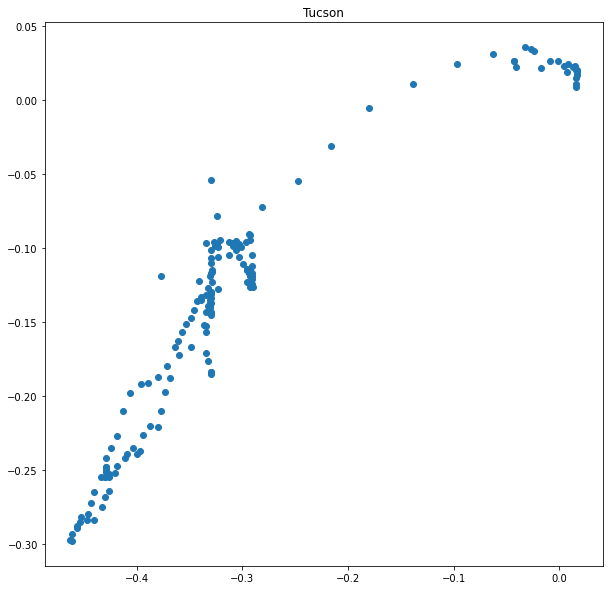

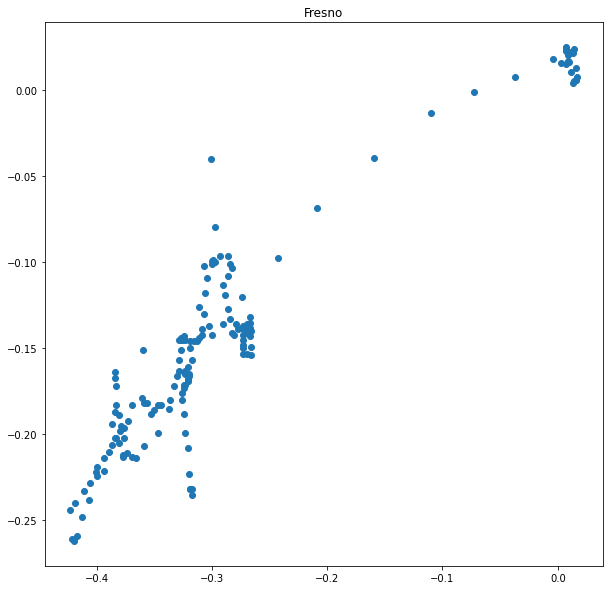

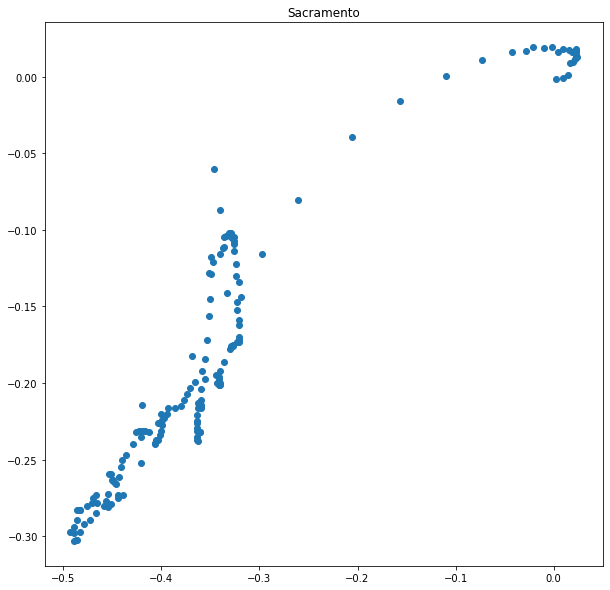

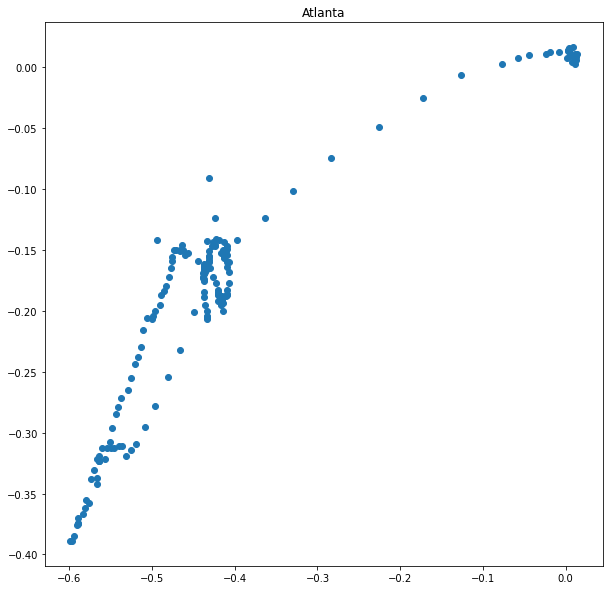

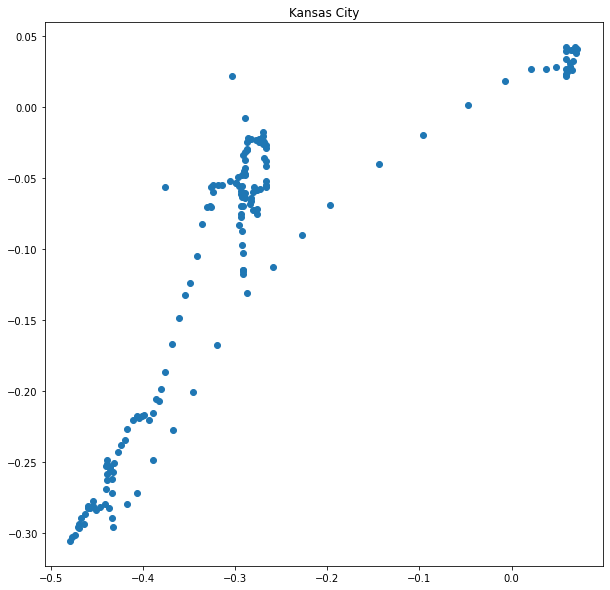

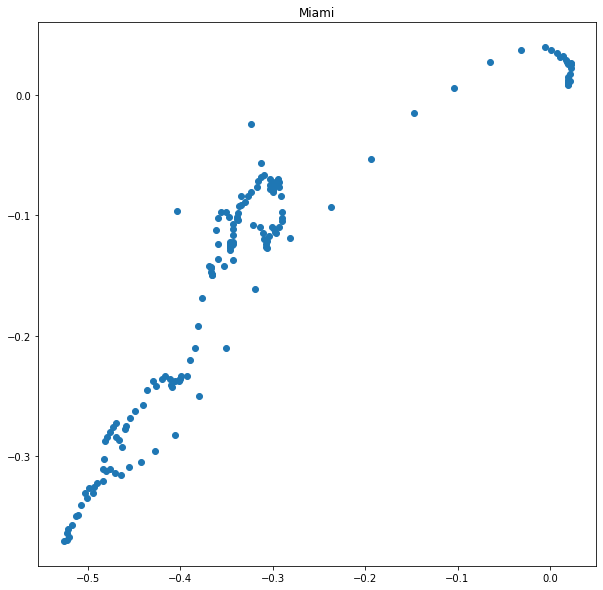

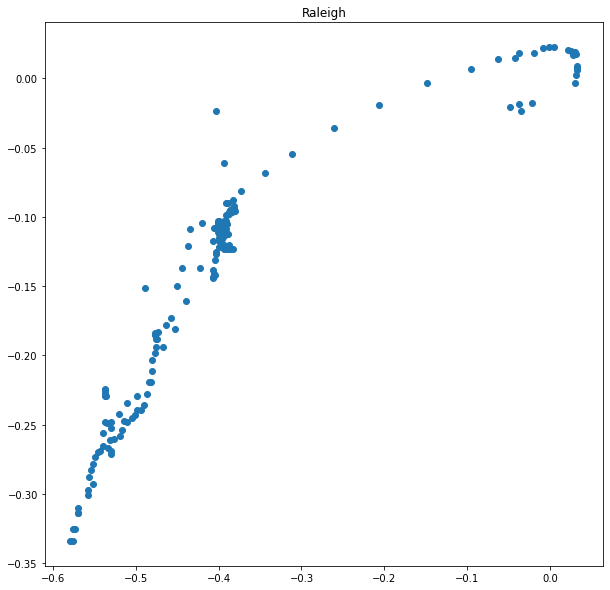

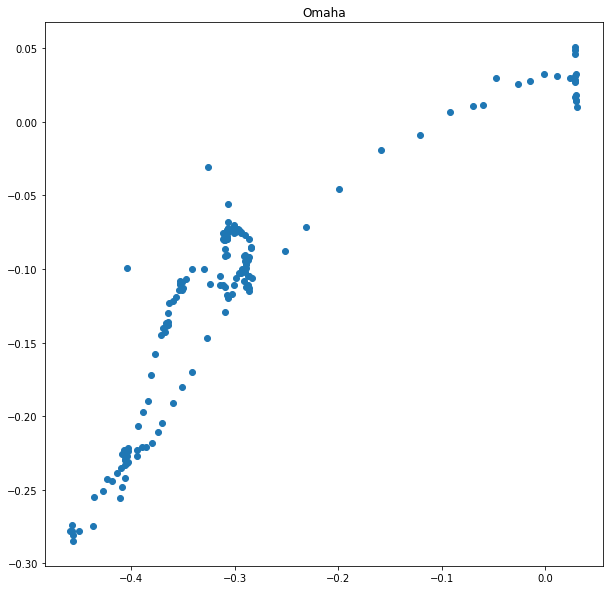

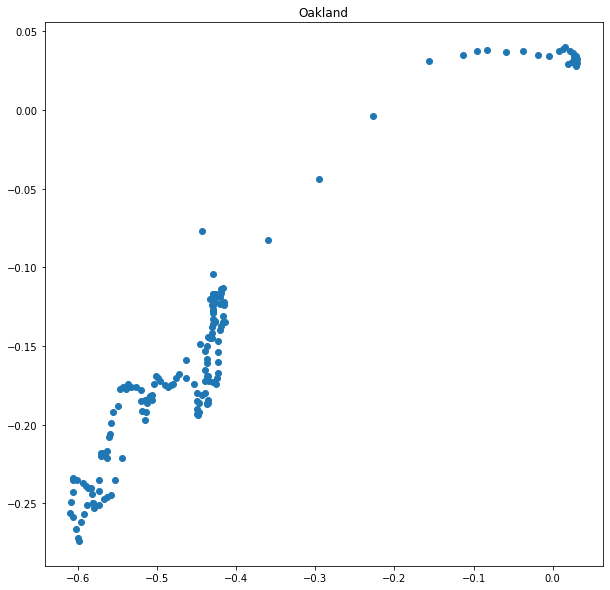

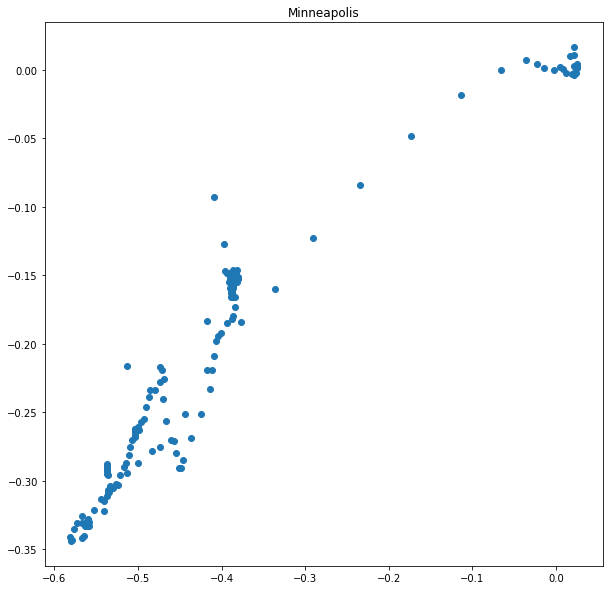

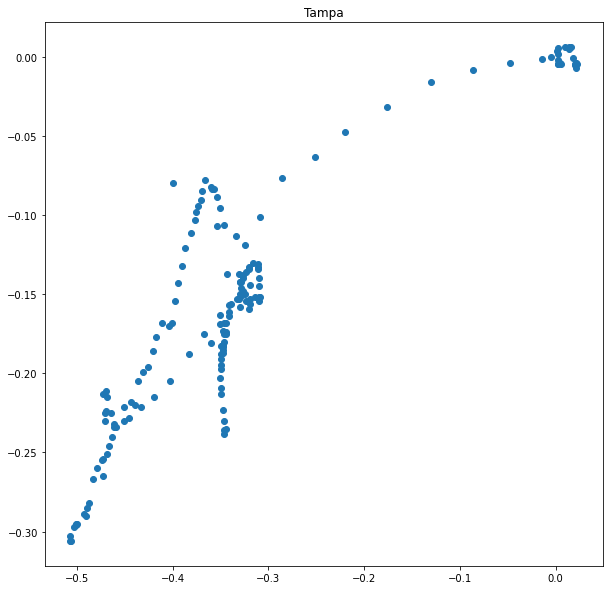

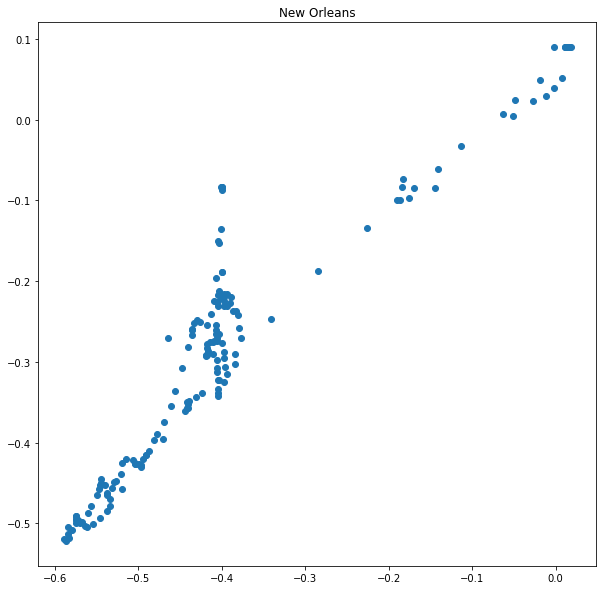

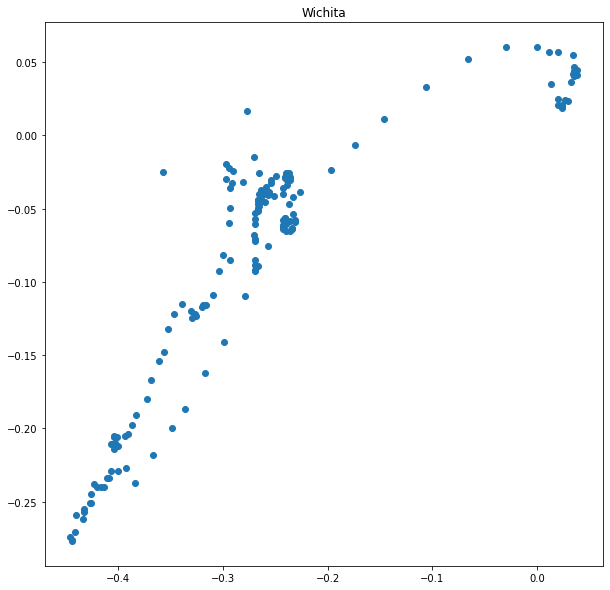

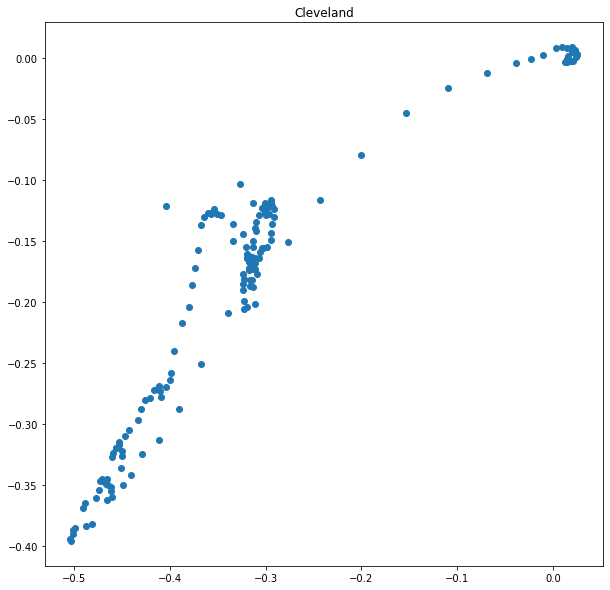

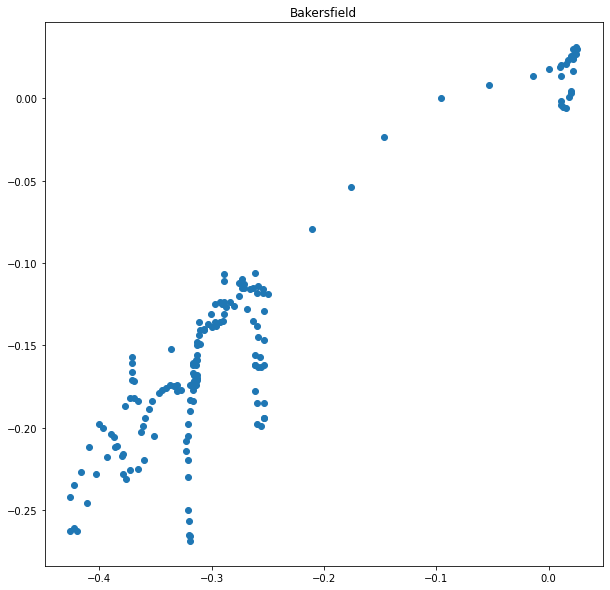

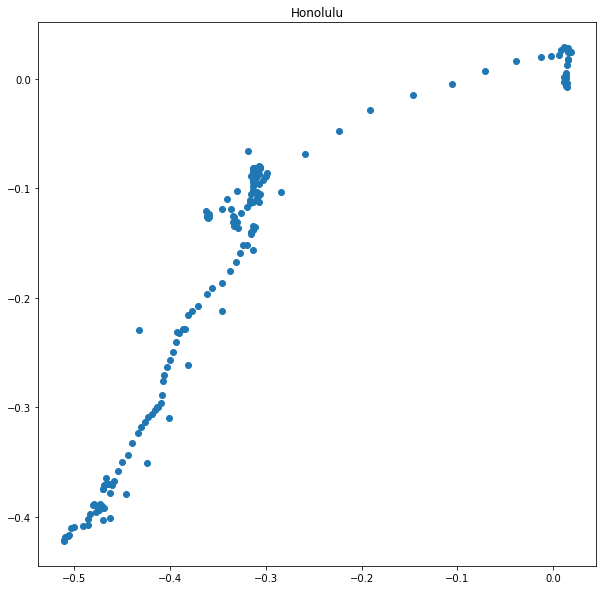

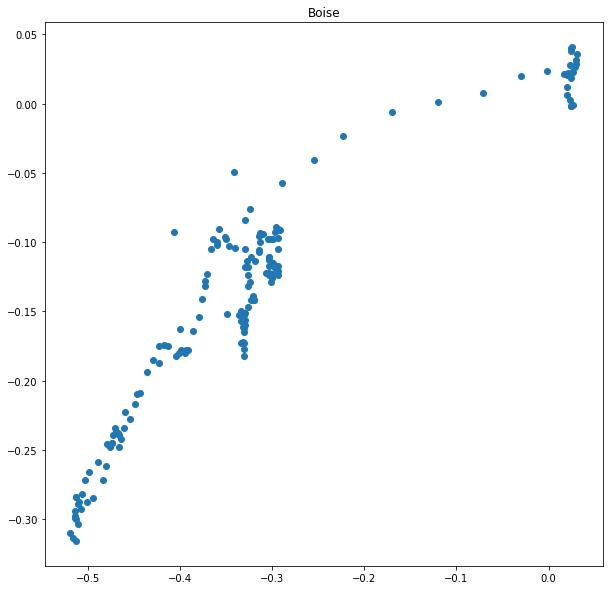

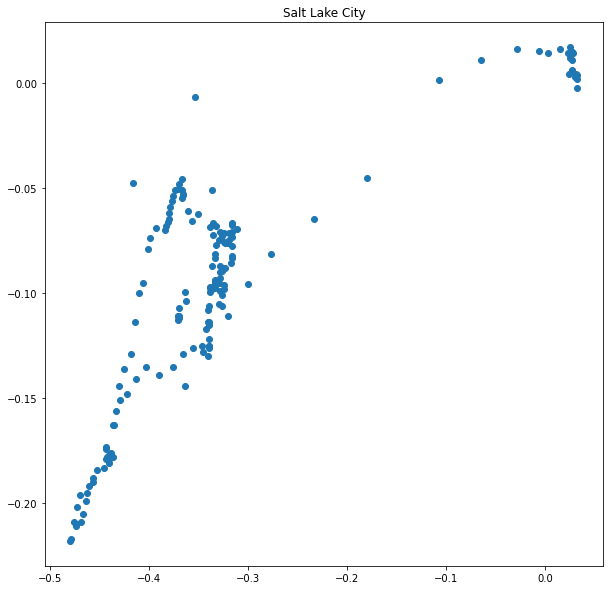

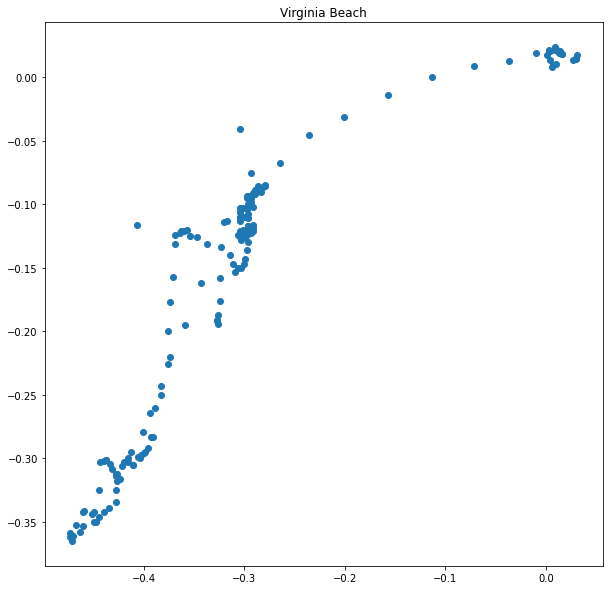

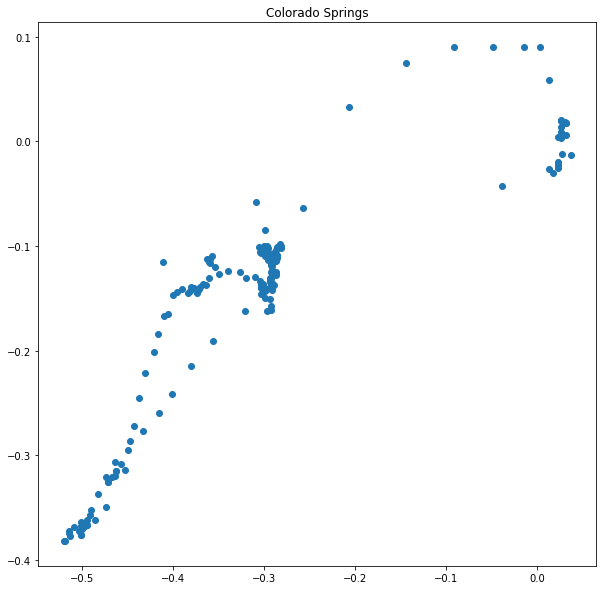

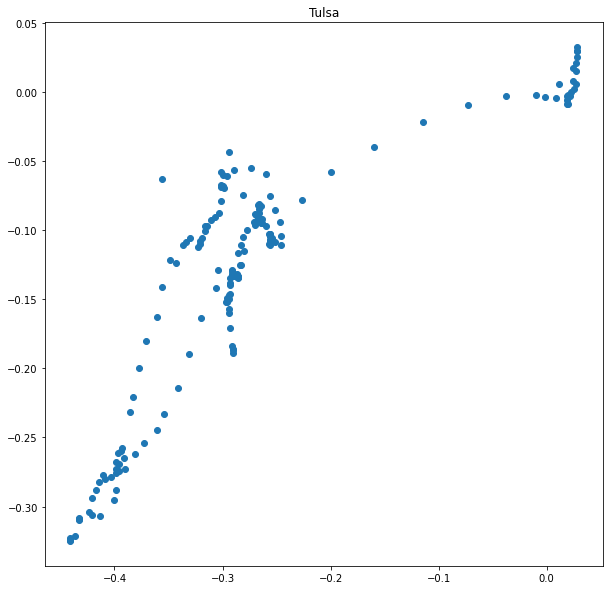

In [74]:
for city in city_dfs:
    plt.figure(figsize = (10,10))
    plt.scatter(city_dfs[city]['gps_workplaces'], city_dfs[city]['merchants_all'])
    plt.title(city)
    plt.show()

In [64]:
'''
Womply Merchants
Small business openings data from Womply.

merchants_all: Percent change in number of small businesses open calculated as a seven-day moving average seasonally adjusted and indexed to January 4-31 2020.
merchants_inchigh: Percent change in number of small businesses open calculated as a seven-day moving average seasonally adjusted and indexed to January 4-31 2020 in high income (quartile 4 of median income) ZIP codes.
merchants_incmiddle: Percent change in number of small businesses open calculated as a seven-day moving average seasonally adjusted and indexed to January 4-31 2020 in middle income (quartiles 2 & 3 of median income) ZIP codes.
merchants_inclow: Percent change in number of small businesses open calculated as a seven-day moving average seasonally adjusted and indexed to January 4-31 2020 in low income (quartile 1 of median income) ZIP codes.
merchants_ss40: Percent change in number of small businesses open calculated as a seven-day moving average seasonally adjusted and indexed to January 4-31 2020 in transportation (NAICS supersector 40).
merchants_ss65: Percent change in number of small businesses open calculated as a seven-day moving average seasonally adjusted and indexed to January 4-31 2020 in education and health services (NAICS supersector 65).
merchants_ss70: Percent change in number of small businesses open calculated as a seven-day moving average seasonally adjusted and indexed to January 4-31 2020 in leisure and hospitality (NAICS supersector 70).
'''
merchants_city_daily_df['datetime']=pd.to_datetime(merchants_city_daily_df[['year','month','day']])

merchants_city_daily_df = merchants_city_daily_df.set_index('datetime')

merchants_city_daily_df.head()

,year,month,day,cityid,merchants_all,merchants_ss40,merchants_ss65,merchants_ss70,cityname,stateabbrev,statename,statefips,city_pop2019
datetime,,,,,,,,,,,,,
2020-01-10,2020,1,10,1,-0.00674,-0.0174,-0.001940,-0.00458,Los Angeles,CA,California,6,10039107
2020-01-11,2020,1,11,1,-0.00772,-0.0191,-0.002970,-0.00650,Los Angeles,CA,California,6,10039107
2020-01-12,2020,1,12,1,-0.00884,-0.0183,-0.005310,-0.00694,Los Angeles,CA,California,6,10039107
2020-01-13,2020,1,13,1,-0.00989,-0.0199,-0.002540,-0.00764,Los Angeles,CA,California,6,10039107
2020-01-14,2020,1,14,1,-0.00784,-0.0145,-0.000225,-0.00776,Los Angeles,CA,California,6,10039107


In [24]:
'''
GeoIDs - City.csv
Geographic identifier: cityid

cityname: The name of the city.
stateabbrev: The 2-letter abbreviation of the state in which the city is contained.
statename: The name of the state in which the city is contained.
statefips: The fips code of the state in which the city is contained.
city_pop2019: The population of the city in 2019.
'''


city_geoids_df.head()

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019
0,1,Los Angeles,CA,California,6,10039107
1,2,New York City,NY,New York,36,8336817
2,3,Chicago,IL,Illinois,17,5150233
3,4,Houston,TX,Texas,48,4713325
4,5,Phoenix,AZ,Arizona,4,4485414
